In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
from sklearn.datasets import load_breast_cancer

In [51]:
bc = load_breast_cancer()

In [59]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [60]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [63]:
type(bc)

sklearn.utils.Bunch

In [64]:
data = pd.DataFrame(bc.data, columns=[bc.feature_names])
data['Target'] = pd.Series(data=bc.target, index=data.index)
print (data.shape)

(569, 31)


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
(mean radius,)                569 non-null float64
(mean texture,)               569 non-null float64
(mean perimeter,)             569 non-null float64
(mean area,)                  569 non-null float64
(mean smoothness,)            569 non-null float64
(mean compactness,)           569 non-null float64
(mean concavity,)             569 non-null float64
(mean concave points,)        569 non-null float64
(mean symmetry,)              569 non-null float64
(mean fractal dimension,)     569 non-null float64
(radius error,)               569 non-null float64
(texture error,)              569 non-null float64
(perimeter error,)            569 non-null float64
(area error,)                 569 non-null float64
(smoothness error,)           569 non-null float64
(compactness error,)          569 non-null float64
(concavity error,)            569 non-null float64
(concave points error,)     

In [67]:
data.plot?

In [82]:
import seaborn as sns

In [90]:
features_mean= list(data.columns[0:11])


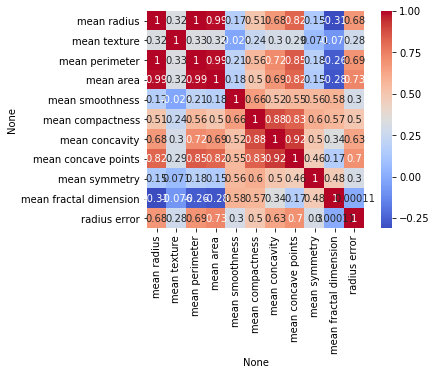

In [91]:
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [92]:
feature_selected = ['mean area', 'mean perimeter', 'mean concavity', 'mean concave points', 'mean radius']

In [104]:
X = data.loc[:,features_mean]
y = data.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [106]:
rf = RandomForestClassifier?

In [107]:
rf = RandomForestClassifier(n_estimators = 50)

In [108]:
rf.fit(X_train, y_train)

C:\Users\HP RYZEN 3\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
yp = rf.predict(X_test)

In [110]:
yp

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [112]:
rf.score(X_test, y_test)

0.9298245614035088

In [113]:
rf.score(X_train, y_train)

1.0